In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 as cv 
import base64, zlib
import json
import os

In [2]:
 def base64_2_mask(s):
    z = zlib.decompress(base64.b64decode(s))
    n = np.fromstring(z, np.uint8)
    mask = cv.imdecode(n, cv.IMREAD_UNCHANGED)[:, :, 3].astype(bool)
    return mask


In [12]:
def load_mask(path, image):
    with open(path,'r') as file:
        data = json.load(file)

    masks = {}
    for item in data["objects"]:
        code = item["bitmap"]["data"]
        origin = item["bitmap"]["origin"]
        mask = base64_2_mask(code)
        mask_center = np.array([mask.shape[1]/2, mask.shape[0]/2])
        mask_center += origin

        up = np.zeros((origin[1],mask.shape[1]))
        mask2 = np.vstack((up,mask))
        left = np.zeros((mask2.shape[0], origin[0]))
        mask3 = np.hstack((left,mask2))
        down = np.zeros((image.shape[0]-mask3.shape[0],mask3.shape[1]))
        mask4 = np.vstack((mask3,down))
        right = np.zeros((mask4.shape[0],image.shape[1]-mask4.shape[1]))
        mask5 = np.hstack((mask4,right))

        masks[item["classTitle"]] = mask5.astype('uint8')
    
    return masks

In [8]:
def dice_metric(truth, pred):
    intersection = 2.0 * np.sum(truth * pred)
    union = np.sum(truth) + np.sum(pred)
    if np.sum(truth) == 0 and np.sum(pred) == 0:
        return 1.0

    return intersection / union

In [5]:
manual_ann_dir = "manual/crack/ann/"
pred_ann_dir = "prediction_v3/crack/ann/"
image_dir = "../../ImageSegmentation/OutputFiles/Output_aug/"

ann_paths = os.listdir(manual_ann_dir)

In [6]:
path = ann_paths[2]
name = path.split('.')[0]

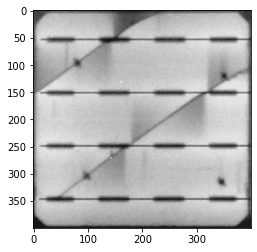

In [7]:
image = cv.imread(image_dir+name+'.jpg')
plt.imshow(image, "gray")

In [13]:
masks_manual = load_mask(manual_ann_dir+path, image)
masks_pred = load_mask(pred_ann_dir+path, image)

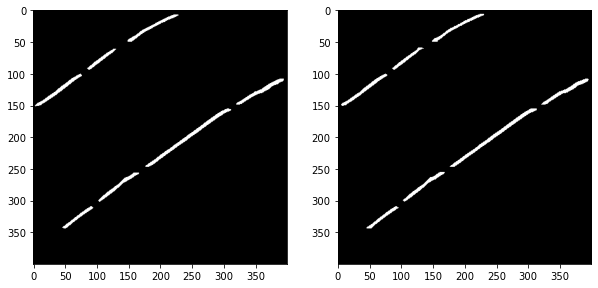

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(masks_manual["crack_b_unet"], 'gray')
ax[1].imshow(masks_pred["crack_b_unet"], "gray")

In [18]:
dice_metric(masks_manual["crack_b_unet"], masks_pred["crack_b_unet"])

0.9548810500410172